In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
user_data = pd.read_csv('user_data.csv')


In [3]:
logs = pd.read_csv('logs.csv')

Посмотрим на данные датасетов

In [4]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [5]:
# Размер датасета
user_data.shape

(2954, 3)

In [6]:
# Типы данных
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [7]:
# Есть ли пропуски
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [8]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [9]:
# Сколько всего уникальных платформ
logs.platform.nunique()

3

In [10]:
# Пропуски
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [11]:
# Описательная статистика
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [12]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


Узнаем какой клиент совершил больше всего успешных операций

In [73]:
success_num = logs.query('success == True') \
                    .groupby('client', as_index=False) \
                    .agg({'success': 'value_counts'}) \
                    .sort_values('success')

In [74]:
success_num

,client,success
0,40,1
1882,65936,1
1883,66064,1
1884,66245,1
1885,66266,1
...,...,...
810,28719,41
1487,52870,41
1020,36165,41
2626,92584,41


In [75]:
# Максимальное число успешных операций
max_s = success_num.success.max()
max_s

41

,client,success
0,40,1
1882,65936,1
1883,66064,1
1884,66245,1
1885,66266,1
...,...,...
810,28719,41
1487,52870,41
1020,36165,41
2626,92584,41


In [76]:
successful_clients = success_num.query('success == @max_s') \
                                .sort_values('client') \
                                .client \
                                .tolist() 

In [77]:
successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [78]:
', '.join([str(client) for client in successful_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

Посмотрим с какой платформы осуществляется наибольшее количество успешных операций

In [28]:
logs.query('success == True').agg({'platform': 'value_counts'}).idxmax()

platform    phone
dtype: object

In [29]:
logs.query('success == True').platform.value_counts().idxmax()

'phone'

Какую платформу предпочитают премиумные клиенты?

In [30]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [31]:
data = user_data.merge(logs)

In [32]:
data.query('premium == True').platform.value_counts().idxmax()

'phone'

In [79]:
Визуализируем распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

SyntaxError: invalid syntax (Temp/ipykernel_5196/2409469537.py, line 1)

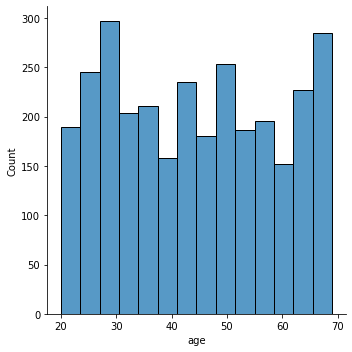

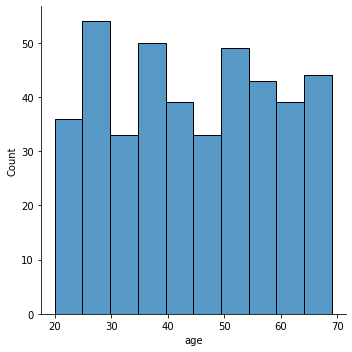

In [33]:
sns.displot(data.query('premium == False').age)
sns.displot(data.query('premium == True').age)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

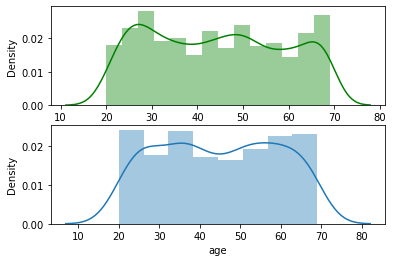

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=1)
sns.distplot(data.query('premium == False').age, ax=ax[0], color = 'green')
sns.distplot(data.query('premium == True').age, ax=ax[1])

Построим график распределения числа успешных операций

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success'>

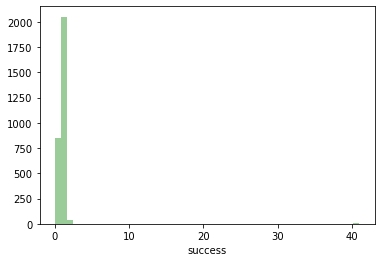

In [83]:
# x – успешные операции
# y – количество клиентов
data = user_data.merge(logs, on='client')

client_success = data.groupby('client', as_index=False) \
    .agg({'success': 'sum'})

sns.distplot(client_success.success, kde=False, color='green')

Проверим данные графика распределения числа успешных операций

In [84]:
client_success.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

Визуализируем число успешных операций, сделанных на платформе computer, в зависимости от возраста.
Узнаем, клиенты какого возраста совершили наибольшее количество успешных действий

In [85]:
age_success = data.query('success == True and platform == "computer"').groupby('age', as_index=False).agg({'success':'count'})

In [86]:
# Максимальный возраст и число успешных операций
age_success.max()

age        69
success    49
dtype: int64

<AxesSubplot:xlabel='age', ylabel='success'>

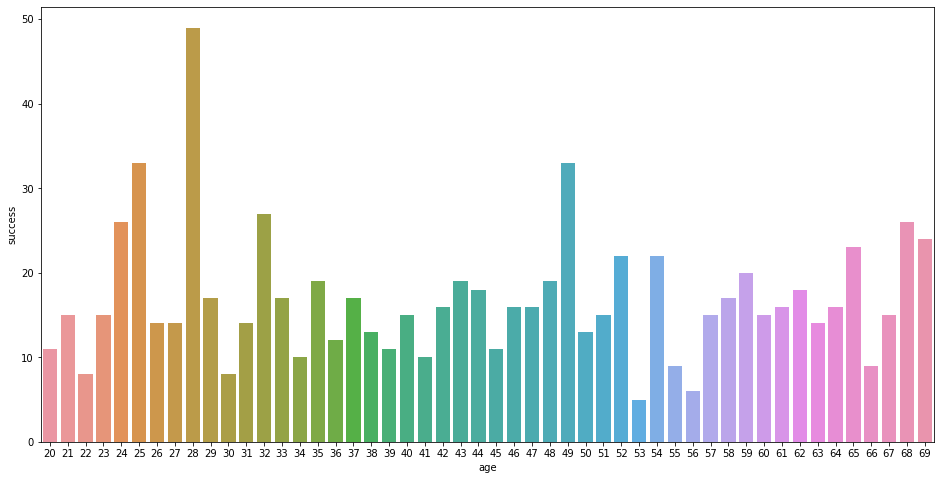

In [91]:
plt.figure(figsize=(16, 8))
sns.barplot (x = "age", y="success", data=age_success)

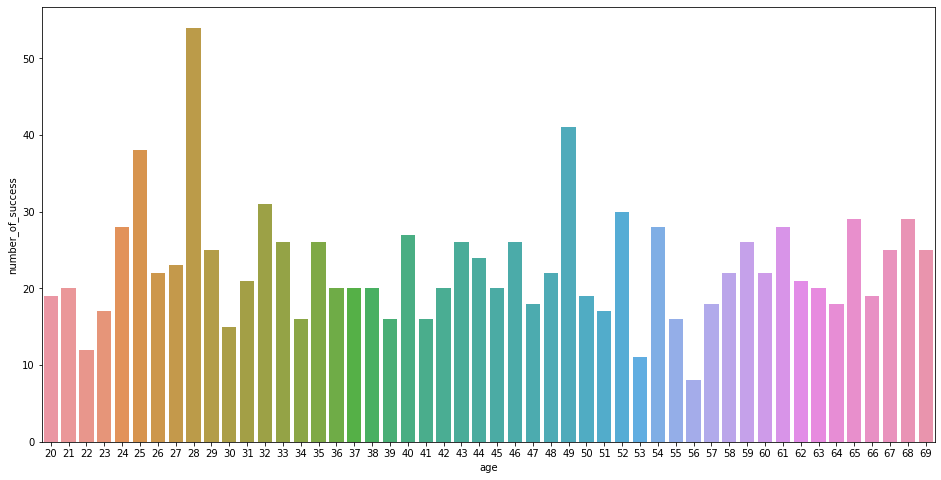

In [95]:
# Альтернативный метод через countplot
success_from_pc = data.query('platform == "computer"')


plt.figure(figsize=(16, 8)) 
ax = sns.countplot(x='age', data=success_from_pc)
ax.set(xlabel='age', ylabel='number_of_success')
sns.despine  
plt.show()